## Bayesian vs frequentist inference

# Intuition
Bayesian vs frequentist inference


**FIGURE PLACEHOLDER:** ![Bayesian vs frequentist inference](image_placeholder)

# Notations

In statistical inference, two primary paradigms are often discussed: **Bayesian** and **Frequentist**. Both approaches aim to estimate parameters and make predictions from data, but they differ fundamentally in how they interpret probability, model uncertainty, and approach inference.

## Interpretation of Probability

- **Bayesian Inference**: In Bayesian statistics, probability is interpreted as a **degree of belief** or **subjective probability**. It quantifies the uncertainty about an event or parameter, based on prior knowledge, and is updated as new data becomes available. Probability is assigned to parameters or hypotheses, which allows Bayesian inference to treat parameters as random variables.

    - Example: In our example, we want to estimate the effect $\theta$ of a genetic variant $X$ on the trait of interest (e.g., height, denoted as $Y$), the probability of observing the genetic effect is treated as a belief about the strength of the effect before considering the data. For example, the belief about $\theta$ might be expressed as a prior distribution that represents prior knowledge or assumptions about the strength of the genetic effect.

- **Frequentist Inference**: In Frequentist statistics, probability is defined as the **long-run relative frequency** of events occurring in repeated experiments or trials. This approach assumes that parameters are fixed and unknown, and probabilities are assigned to observed data or test statistics, not parameters. In Frequentist inference, parameters are considered deterministic, with no inherent uncertainty, and it does not rely on prior information.

    - Example: In the same genetic study, the genetic effect $\theta$ is considered as a fixed, unknown quantity. The probability is applied to the observed data (i.e., the observed relationship between $X$ and $Y$), but there is no probability assigned to the genetic effect itself. The goal is to estimate $\theta$ based on the observed data and make inferences about the data using statistical tests.



## Parameter Estimation

- **Bayesian Inference**: Parameters are treated as random variables with prior distributions, which represent beliefs about the values before observing the data. After observing data, a **posterior distribution** is derived using Bayes’ theorem, which combines the prior belief and the likelihood of the data. Bayesian estimation provides a full probability distribution for the parameter of interest, allowing for uncertainty quantification.

    - **Bayes’ Theorem**: 
    $$
    P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)}
    $$
    where:
        - $P(\theta | D)$ is the posterior distribution of the genetic effect $\theta$ (e.g., $g$) given the data $D$
        - $P(D | \theta)$ is the likelihood of the data given the parameter
        - $P(\theta)$ is the prior distribution of the genetic effect
        - $P(D)$ is the marginal likelihood of the data

    The posterior distribution $P(\theta | D)$ incorporates both **prior knowledge** and **the likelihood of the observed data**, allowing for a more flexible estimation of the genetic effect and its uncertainty.

- **Frequentist Inference**: Parameters are fixed but unknown quantities, and the goal is to estimate their values based on observed data. In Frequentist inference, the point estimate (such as the sample mean or regression coefficient) is often used to estimate the true parameter. Confidence intervals are used to quantify uncertainty, but these intervals are based on the sampling distribution of the estimator, not on any prior belief.

    - **Maximum Likelihood Estimation (MLE)** is a common Frequentist method for estimating parameters. It chooses the parameter values that maximize the likelihood of observing the data:
    $$
    \hat{\theta} = \arg \max_{\theta} P(D | \theta)
    $$

    In this case, the goal is to estimate the genetic effect $g$ by maximizing the likelihood of the observed relationship between $g$ and $y$ given the data.


## Uncertainty Quantification

- **Bayesian Inference**: Bayesian methods provide a **full posterior distribution** for parameters, which reflects uncertainty after observing the data. The posterior distribution allows for more comprehensive uncertainty quantification, enabling the calculation of credible intervals (the Bayesian analog of confidence intervals) and other measures of uncertainty.

    - **Credible Interval**: The range of values for the genetic effect $g$ within which the true value lies with a certain probability, e.g., a 95% credible interval means there is a 95% probability that the true genetic effect is within this interval, given the observed data and prior information.

- **Frequentist Inference**: In Frequentist statistics, uncertainty is quantified using **confidence intervals**, which are derived from the sampling distribution of the estimator. A 95% confidence interval means that if the experiment were repeated many times, 95% of the calculated intervals would contain the true genetic effect $g$.

    - **Confidence Interval**: A range of values for the genetic effect $g$ that, with a certain level of confidence (e.g., 95%), would cover the true value of the genetic effect in repeated sampling, given the data observed.



## Model Assumptions and Prior Information

- **Bayesian Inference**: Bayesian methods incorporate **prior information** through the prior distribution. This allows for the inclusion of expert knowledge, previous studies, or even weak priors when no information is available. The prior distribution is updated based on the data using Bayes' theorem, providing a posterior that reflects both prior beliefs and the observed evidence.

    - Example: If previous studies suggest that the genetic effect $\theta$ is likely to be small (e.g., $\theta \sim \mathcal{N}(0, 0.1)$), this prior can be incorporated into the analysis. As new data are observed, the prior belief is updated to reflect the new evidence, resulting in a posterior distribution for $\theta$.

- **Frequentist Inference**: Frequentist methods do not use prior information. The focus is on the data collected in the current study, with no attempt to incorporate external beliefs. This approach aims to provide estimates and inferences solely from the observed data, based on the assumption that parameters are fixed but unknown.

    - Example: In the Frequentist framework, we would estimate the genetic effect $\theta$ solely from the observed data (e.g., regression of $Y$ on $X$) without incorporating prior beliefs about the effect of the genetic variant.



## Computation and Complexity

- **Bayesian Inference**: Bayesian methods can be computationally intensive, especially for complex models. The need to sample from the posterior distribution (often through Markov Chain Monte Carlo (MCMC) methods) can be computationally expensive. However, with the development of more efficient algorithms and computational power, Bayesian inference has become more practical in many contexts.

- **Frequentist Inference**: Frequentist methods are often simpler and computationally less demanding, particularly when using methods like Maximum Likelihood Estimation (MLE) or least squares regression. These methods typically rely on asymptotic approximations and may require fewer computational resources compared to Bayesian approaches.


## Flexibility and Interpretability

- **Bayesian Inference**: Bayesian methods are highly flexible and can be applied to a wide range of models, including hierarchical models and models with complex relationships between variables. The ability to incorporate prior knowledge and update beliefs as more data becomes available provides a more adaptive and interpretable framework.

- **Frequentist Inference**: Frequentist methods are typically less flexible in their model specification. While they are effective for standard analyses, they can be less adaptive to complex models or scenarios where prior information is valuable.


# Example

We have demonstrated in Topics 6 and 7 (as well as in Topics 9 and 10) how Bayesian methods handle this problem. In this section, we will illustrate how frequentist methods approach the same task.

In [4]:
rm(list=ls())
set.seed(2)

# Simulate true mean and effect size
baseline <- 170  # Population mean of the trait (e.g., height in cm) when the genetic variant has no effect (Model 1)
theta_true <- 2  # True effect size of the genetic variant. This represents the change in height (in cm) associated with each additional minor allele (Model 2)
sd_y <- 1  # Standard deviation of the trait (e.g., variability in height measurement within the population)

# Simulate genotypes for three individuals
genotype <- c(1, 2, 0)

# Simulate height values for three individuals based on genotypes
n = length(genotype)
height_values <- rnorm(n, mean = baseline + theta_true * genotype, sd = sd_y)

# Display the simulated data
data.frame(genotype = genotype, height = height_values)


genotype,height
<dbl>,<dbl>
1,171.1031
2,174.1848
0,171.5878


In [8]:
# Define the log-likelihood function
log_likelihood <- function(theta, genotype, height, baseline, sd) {
  n <- length(genotype)
  log_likelihood_val <- sum(dnorm(height, mean = baseline + theta * genotype, sd = sd, log = TRUE))
  return(log_likelihood_val)
}

# Define the negative log-likelihood function for optimization
neg_log_likelihood <- function(theta, genotype, height, baseline, sd) {
  return(-log_likelihood(theta, genotype, height, baseline, sd))
}

# Estimate theta using MLE (optimizing the negative log-likelihood)
mle_result <- optimize(neg_log_likelihood, interval = c(-5, 5), genotype = genotype, height = height_values, baseline = baseline, sd = sd_y)

# Extract the estimated theta
theta_mle <- mle_result$minimum

print(paste0("The MLE of theta is ", theta_mle))

[1] "The MLE of theta is 1.8945567645337"


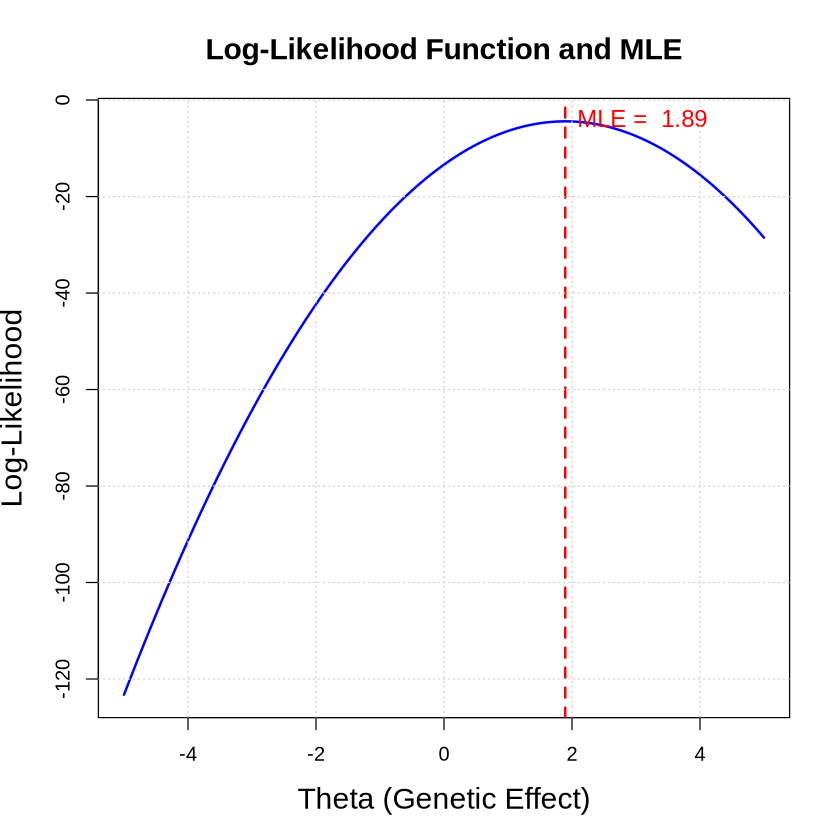

In [15]:

# Plot the log-likelihood function
theta_vals <- seq(-5, 5, length.out = 100)
log_likelihood_vals <- sapply(theta_vals, function(theta) log_likelihood(theta, genotype, height_values, baseline, sd_y))

# Plot the log-likelihood function
plot(theta_vals, log_likelihood_vals, type = "l", col = "blue", lwd = 2, 
     xlab = "Theta (Genetic Effect)", ylab = "Log-Likelihood", 
     main = "Log-Likelihood Function and MLE", cex.lab = 1.5, cex.main = 1.5)

# Add a vertical line at the MLE
abline(v = theta_mle, col = "red", lty = 2, lwd = 2)

# Add text to label the MLE
text(theta_mle, max(log_likelihood_vals), labels = paste("MLE = ", round(theta_mle, 2)), pos = 4, col = "red", cex = 1.2)

# Show the plot
grid()